# What are the differences and similarities between schools and philosophers?


<h3><center>Hui Xiang (hx2303)</center></h3>

In [2]:
# refer to https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
#uncomment to install all requried dependency
#pip install pandas
#pip install numpy
#pip install nltk
#nltk.download('vader_lexicon')
#nltk.download('wordnet')
#pip install matplotlib
#pip install plotly
#pip install cufflinks
#pip install sklearn
#pip install cufflinks

In [4]:
from PIL import Image 
import pandas as pd
import numpy as np
import nltk 
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import plot, iplot
import plotly.express as px

import cufflinks as cf
from sklearn.cluster import KMeans

pio.renderers.default='notebook'
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot;

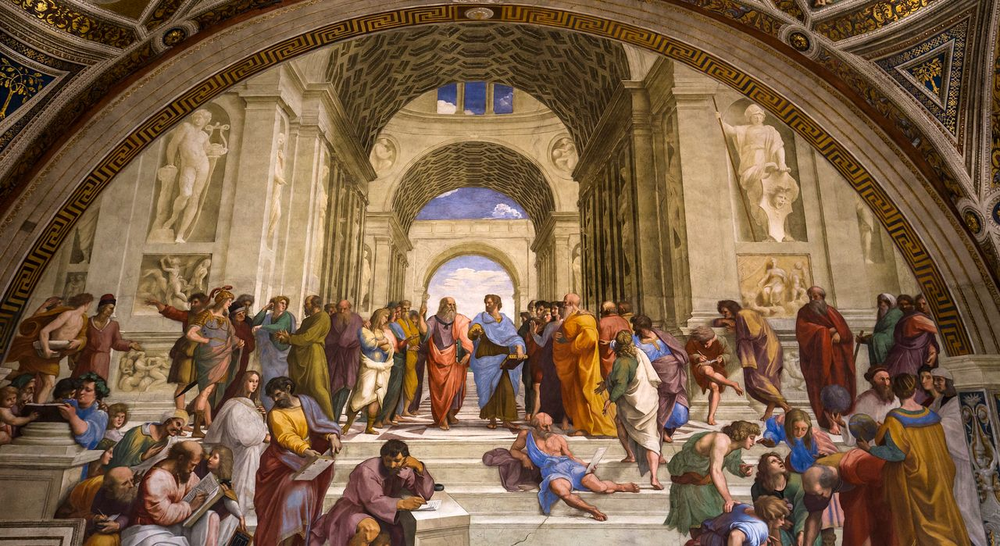

In [5]:
size = 1000, 1000
image = Image.open("../figs/images report/philosophers.jpg") ## https://explorethessaloniki.eu/stories-aristotle-in-a-nutshell
image.thumbnail(size, Image.ANTIALIAS) 
image

Philosophers are acknowleged to be the most critical-minded thinkers that we know. And their think process happens through the writting as a form of intellectual exploration. 
Below I will explore some questions including:
- Can different schools/philosophers think the same thought ?
- Is there a large difference in sentence emotion for schools ?
- Do philosophers in the different school have similar sentiment？

The dataset used for this project is a pre-processed one from the History of philosophy project (http://philosophydata.com/). It contains over 300000 sentences mentioned by philosophers from 13 schools. The dataset  also includes additional information for the length of each sentence, publication date as well as the pre-processed sentences obtained from different text-cleaning methodologies.

Prior to answering above three questions, I did some data-preprocessing on the text data. Specifically, I removed some stopwords, then I lemmatized all the words in the sentences to ensure that all the transformed words are in the same format.

In [6]:
data = pd.read_csv("../philosophy_data.csv")

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+') # without punctuation
lemmatizer = WordNetLemmatizer()   # init the wordnet lemmatizer

# remove stopwords and PRON
data["clean_str"] = data["lemmatized_str"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word != "-PRON-"]))
# convert the word to a meaninful baseform
data["clean_str"] = data["clean_str"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in tokenizer.tokenize(x)]))

In [8]:
# get the target columns
d = data.drop(columns = ["sentence_spacy","sentence_str","sentence_lowered","tokenized_txt","lemmatized_str"])

### Q1.1: Is there any similarity among the trending philosophers ?

I chose the top 5 trending philosophers using the dataset by counting and sorting the sentence length written by each philopher and do a word cloud analysis to get the most frequent words used in their texts.

In [10]:
# sum the sentences for each author
sentence_count_author = d.groupby(["author"])["sentence_length"].sum().reset_index().sort_values(by="sentence_length",ascending = False)

fig = px.histogram(sentence_count_author, 
                   x="author", y= "sentence_length",
                  title = "Most productive Philosophers")
fig.show()

From the plot, we observe that Aristotle, plato, Hegel, Foucault, and Kant are most productive authors
compared to others. The amount of sentence they published also denote their popularity. 

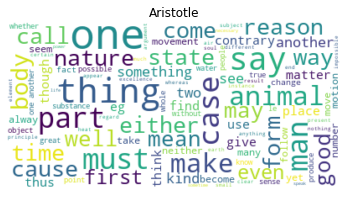

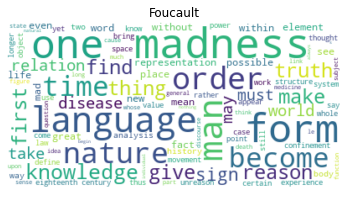

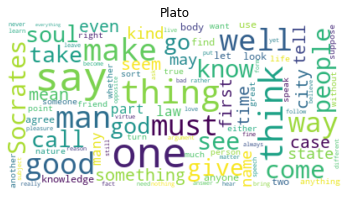

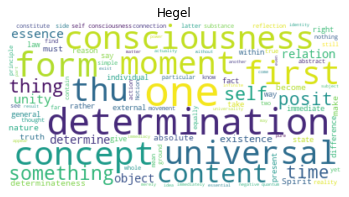

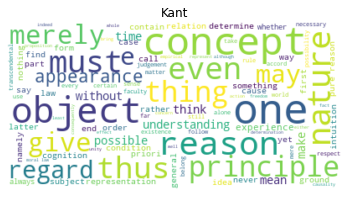

In [11]:
# top five productive philosophers
productive_authors = set(sentence_count_author["author"][0:5])

for author in productive_authors:
    author_data = d[d["author"]==author]
    str_data = ' '.join(txt for txt in author_data["clean_str"]) # combine all the sentences
    
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_data) # on str_data corpus
    plt.imshow(wordcloud, interpolation='bilinear')  # appear smoother
    plt.axis("off")
    plt.title(author)
    plt.show()


From the word-cloud above, I found that Aristotle, Kant, and Hegel put more emphasis on logical understanding, and to some extent they have a lot of similar thoughts thet can be observed from the word-cloud.

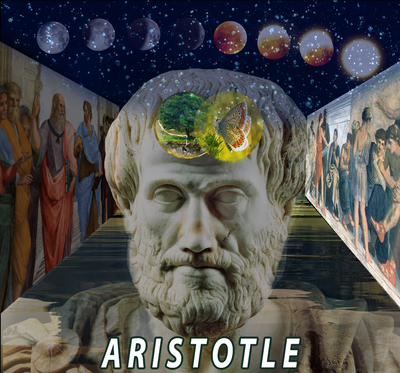

In [12]:
size = 400, 400
image = Image.open("../figs/images report/aristotle.jpg") ## https://explorethessaloniki.eu/stories-aristotle-in-a-nutshell
image.thumbnail(size, Image.ANTIALIAS) 
image

As a father of the Western logic, Aristotle puts his emphasis on reasoning and his abundant remarks about human nature as rational animals scattered through his texts and we can see the words such as "reason", animal" displayed on the wordcloud. 

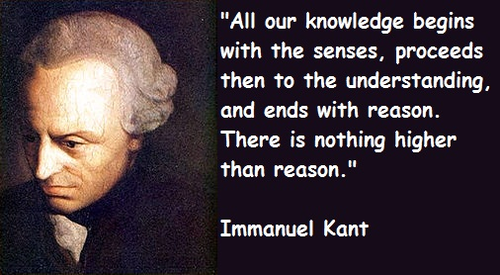

In [13]:
size = 500, 500
image = Image.open("../figs/images report/kant.jpg") ## https://www.nuttyhistory.com/enlightenment.html
image.thumbnail(size, Image.ANTIALIAS) 
image

Kant also supports reason and logic. He belives that reason is the source of morality and the aesthetics comes from a faculty of disinterested judgement. The most frequent words used by Kant including "reason", "principle", "concept" are all reflections of his believe and thought.

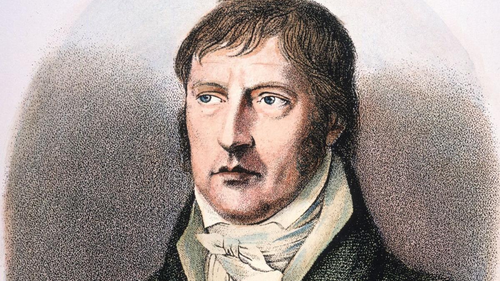

In [14]:
size = 500, 500
image = Image.open("../figs/images report/hegel.jpg") ## https://www.thetimes.co.uk/article/an-expert-s-view-on-jos-mourinho-s-hegel-quote-7d0b9qbs2
image.thumbnail(size, Image.ANTIALIAS) 
image

Hegel mentioned that "the rational alone is real". What he meant was that all reality is capable of being expressed in rationale. Again, many of the words he used most in his sentences like "determination", "consciousness" and "universal" all demonstrate his believe.

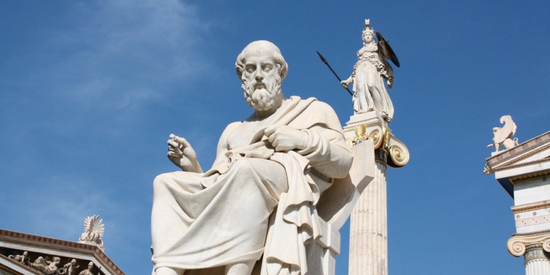

In [15]:
size = 550, 550
image = Image.open("../figs/images report/Plato.jpg") ## https://www.cityu.edu/what-plato-can-teach-us-about-leadership-part-1-of-2/
image.thumbnail(size, Image.ANTIALIAS) 
image

In contrast, rather than the empirical, practical, and commonsensical thoughts of the previous three philosophers, Plato's 
believe and thought is more abstract and utopian. Some of his words including "soul" and "seem" show the abstract perspective of his thought. Plato is a devoted follower of Socrates and the word Socrates was mentioned frequently by Plato as 
shown in the word cloud.

### Q1.2: Can different school share the same thoughts ?

In [16]:
sentence_count_school = d.groupby("school")["sentence_length"].sum().reset_index().sort_values(by="sentence_length",ascending = False)

fig = px.histogram(sentence_count_school, 
                   x="school", y= "sentence_length",
                  title = "Most productive schools")
fig.show()

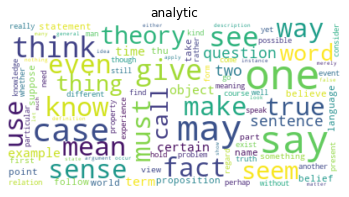

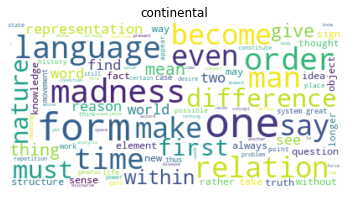

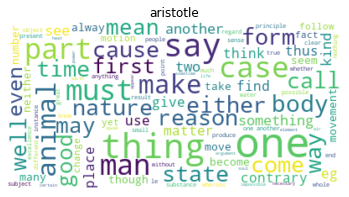

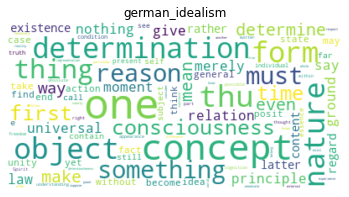

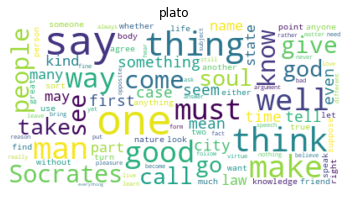

In [17]:
productive_schools = set(sentence_count_school["school"][0:5])

for school in productive_schools:
    school_data = d[d["school"] == school]
    str_data = ' '.join(txt for txt in school_data["clean_str"])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(school)
    plt.show()

Similar to word count of philosophers, we can also find resemblance and difference of schools' thoughts and believes through the word cloud.

Analytic school and Aristotle school are both supporters of logics, reasons and natural science. Many of the words used by them are more rational like "theory", "think", "reason", "fact" and "nature".

On the contrast, continental school have a totally different view than Analytic school and Aristotle school. Continental school reject the view that natural science is the only way to accurately understand the natural phenomena. They think science depends upon a "pre-theoretical substrate of experience" which is inadequate to fully understand the nature. They tend to take a strong interest in the unity of theory and practice. Therefore, we can observe that continental school like to use words including "form" and "relation" demonstrates their opinion about the unity and combination of theory and practice. The words like "nature" and "difference" shows their rejection towards the scientific understanding about nature.

Plato and German Idealism schools are both advocates of idealism. However, German Idealism acknowledge the deficiencies of empiricism, which can be observed from the words like "determination" and "consciousness" that German Idealism is less abstract and utopian compared to Plato.

By using word count exploratory data analysis, we are able to capture information which reflects the thoughts of philosophers. Some common words shared by multiple schools/authors are signs which could be the evidence of the similarity among their thoughts. The difference of words used by these schools/authors can also show the difference of their thoughts. These information helps us to answer the first scientific question: Whether there is any similarity/difference in the believe and thoughts among the trending philosopers/schools.

### Q2：Is there a large difference in sentence emotion for schools ?

In [18]:
sentAnalyzer = SentimentIntensityAnalyzer()

stack_df_school = pd.DataFrame(columns = ["school",
                                   "percentage of positive", 
                                   "percentage of negative",
                                   "percentage of neutral"])

for school in sentence_count_school["school"]:
    
    school_data = d[d["school"]==school]
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for txt in school_data["clean_str"]:  
        
        sentDict = sentAnalyzer.polarity_scores(txt) 
        
        # normalized metric to calculate the sum of all lexicon ratings
        if sentDict['compound'] >= 0.05:
            positive_count = positive_count +1
        elif sentDict['compound'] <= -0.05 :
            negative_count = negative_count +1
        else:
             neutral_count = neutral_count +1
    
    total_count = positive_count + negative_count + neutral_count
    percentage_positive = positive_count/total_count
    percentage_negative = negative_count/total_count
    percentage_neutral = neutral_count/total_count
    stack_df_school.loc[len(stack_df_school)] = [school,percentage_positive,percentage_negative,percentage_neutral]

# stack_df_school


In [20]:
# set the school column as the index of the dataframe
stack_df_school_index = stack_df_school.set_index('school')

fig = stack_df_school_index.iplot(asFigure=True, kind='bar', barmode = 'stack',
               xTitle='School', yTitle='Percentage',title = 'Sentimental analysis for schools')
iplot(fig)

From the stacked bar plot above, we can see a clear pattern that rationalism, empiricism and capitalism schools have the most percentage of positive words. In contrast, Continental, feminism, nietzsche and stoicism have the most percentage of negative words. Analytics and phenomenology schools have the most percentage of neutral words.

The percentage of positive words mentioned by rationalism, empiricism and capitalism schools all excees 50%. Among almost all schools, percentage of negative is the lower compared to other 2 aspect of sentiment. Phenomenology school mentioned over 45% neutral words.

In [21]:
km = KMeans(n_clusters=5, random_state=50)
y = stack_df_school["school"]
x = stack_df_school.drop("school", axis=1)
km.fit(x)
km.fit
stack_df_school["label"] = km.labels_
#stack_df_school.head()
# km.labels_

In [22]:
PLOT = go.Figure()

label_list = list(stack_df_school.label.unique())
label_list.sort() 

for label in label_list:
    
    PLOT.add_trace(go.Scatter3d(x = stack_df_school[stack_df_school.label == label]['percentage of positive'],
                                y = stack_df_school[stack_df_school.label == label]['percentage of negative'],
                                z = stack_df_school[stack_df_school.label == label]['percentage of neutral'],
                                mode = 'markers+text', marker_size = 8, marker_line_width = 1,
                                name = 'Group ' + str(label+1),
                                text=stack_df_school[stack_df_school.label == label]['school'],
                                textposition="bottom center"))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'percentage of positive', titlefont_color = 'black'),
                                yaxis=dict(title = 'percentage of negative', titlefont_color = 'black'),
                                zaxis=dict(title =' percentage of neutral', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))


Above is the 3D clustering scatter of school using their sentiment analysis result. All 13 schools are divided into 5 groups based on their sentiment level of different emotions: The blue group (group 1) contains schools which mentions most positive words. The green group (group 3) includes schools which frequently mention negative words. The purple group (group 4) is consisted of schools that tend to mention neutral words. The red group (group 2) are all schools which have the mixed sentiment.

We can observe that even schools asserting opposing opinions could use words in similar sentiment level. For example, Plato's thought is more abstract and utopian, while Atristotle's thought is more practical. However, the words they use in their sentences are classified having the similar sentiments.

On the other hand, analytic and rationalism schools are both supporters of logics and reasons. However, the emotion level of these two schools are classified into separate groups. Analytic school like to mention a lot of negative words while rationalism school is keen on positive words.


### Q3:Will philosophers in the different school have similar sentiment ?

In [23]:
sentAnalyzer = SentimentIntensityAnalyzer()

stack_df_author = pd.DataFrame(columns = ["author","school",
                                   "percentage of positive", 
                                   "percentage of negative",
                                   "percentage of neutral"])

for author in sentence_count_author["author"]:
    
    author_data = d[d["author"]==author]
    school_info = author_data["school"].iloc[0]
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    
    for txt in author_data["clean_str"]:  
        
        sentDict = sentAnalyzer.polarity_scores(txt) 
        
        if sentDict['compound'] >= 0.05:
            positive_count = positive_count +1
        elif sentDict['compound'] <= -0.05 :
            negative_count = negative_count +1
        else:
             neutral_count = neutral_count +1
    
    total_count = positive_count + negative_count + neutral_count
    percentage_positive = positive_count/total_count
    percentage_negative = negative_count/total_count
    percentage_neutral = neutral_count/total_count
    stack_df_author.loc[len(stack_df_author)] = [author,school_info,percentage_positive,percentage_negative,percentage_neutral]

#stack_df_author.head()

In [26]:
stack_df_author = stack_df_author.sort_values(by=['school'], ascending=False)
stack_df_author['author'] = stack_df_author[['author', 'school']].agg('-'.join, axis=1)
stack_df_author_combined = stack_df_author.drop(['school'],axis=1)
stack_df_author_index = stack_df_author_combined.set_index('author')

fig = stack_df_author_index.iplot(asFigure=True, kind='bar', barmode = 'stack',
               xTitle='Author', yTitle='Percentage',title = 'Sentimental analysis for authors')
iplot(fig)


In [27]:
km = KMeans(n_clusters=5, random_state=50)
y = stack_df_author_combined["author"]
x = stack_df_author_combined.drop("author", axis=1)
km.fit(x)
km.fit
stack_df_author_combined["label"] = km.labels_
#stack_df_author.head()


In [28]:
PLOT = go.Figure()

label_list = list(stack_df_author_combined.label.unique())
label_list.sort() 

for label in label_list:
    
    PLOT.add_trace(go.Scatter3d(x = stack_df_author_combined[stack_df_author_combined.label == label]['percentage of positive'],
                                y = stack_df_author_combined[stack_df_author_combined.label == label]['percentage of negative'],
                                z = stack_df_author_combined[stack_df_author_combined.label == label]['percentage of neutral'],
                                mode = 'markers+text', marker_size = 8, marker_line_width = 1,
                                name = 'Group ' + str(label+1),
                                text=stack_df_author_combined[stack_df_author_combined.label == label]['author'],
                                textposition="bottom center"))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'percentage of positive', titlefont_color = 'black'),
                                yaxis=dict(title = 'percentage of negative', titlefont_color = 'black'),
                                zaxis=dict(title =' percentage of neutral', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

As we can observe from the 3D cluster scatter plot above, a lot of philosophers are grouped together as they use similar way and emotion to express their ideas. Such similarity exists even they are in different school and have different opinions. For example, we can find that in the green group, many philosophers in german idealism school have a very similar word sentiment as some of the philosophers in empiricism and analytic school. They possess different views about the way people learn knowledge about new things. However, their style of using a mixture of positive, negative and neutral words to express their idea is similar. As a result, they fall into the same cluster.

## Conclusion

We saw that emotion might be more related to a person's own personality or a school's own style of work rather than their believes and thoughts. Even schools with imcompatible opinions could have the same emotion while schools holding agreed conceptions might have totally different sentiments when writing sentence. Although the ways and aspects philosopher think about the world are different, they might use the words that are alike to express ideas. 